Aspect theorique :

![](convection.PNG)

Demonstration de stabilité et CFL:

![](CFL.PNG)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear convection without CFL

In [11]:
def linearconv_withoutCFL(u, nx, nt, dx): 
    dt = .025  
    c = 1.
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = u[i] - c*dt / dx * (un[i] - un[i-1])
    return 0

## Linear convection with CFL

In [4]:
def linearconv_withCFL(u, nx, nt, dx):
    c = 1.
    CFL = 0.8
    dt = CFL*dx/np.fabs(c) 
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = u[i] - c*dt / dx * (un[i] - un[i-1])
        
    return 0

## Inputs

In [17]:
nx = 82 #change to 83, 85, 91, ... what do you remark ?
dx = 2 / (nx - 1)
nt = 30    

grid = np.linspace(0,2,nx) 
u0 = np.ones(nx)      
u0[int(.5/dx):int(1 / dx + 1)] = 2  

## Call Funtions

### Function without CFL

Text(0.5, 1.0, '1D Linear Convection')

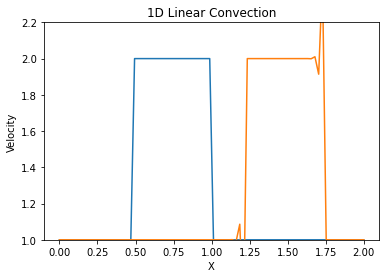

In [18]:
u = u0.copy()
linearconv_withoutCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')  

    Nous remrquons d'apres le shema que notre representation de la fonction de convection semble stable, toutefois lorsqu'on change la valeur de nx (>81,5) la fonction commence à se degenerer et on constate la constitution des pics qui sont singe des instabilité et puis l'explosion du systeme de simulation.

### Function with CFL

Text(0.5, 1.0, '1D Linear Convection')

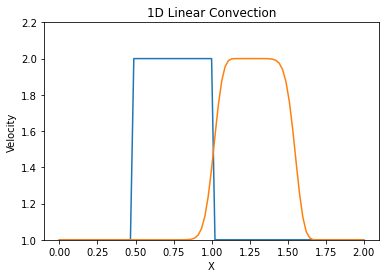

In [16]:
u = u0.copy()
linearconv_withCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection') 

    le repsect des normes de stabilité et de CFL nous garantie la stabilité de notre simulation quelque soit le changement qu'on peut l'operer sur les hypermparametre du systeme ce qui prouve l'enomre importance du CFL.